In [155]:
import os

DIR = "data/fungi_train_val"
filelist = []

n_categories = 20
training_size = 0.8

cat = os.listdir(DIR)
for i in range(n_categories):
    img = os.listdir(DIR + "/" + cat[i])
    train_images = int(len(img)*training_size);
    for j in range(len(img)):
        if j < train_images:
            filelist.append({
                'category': cat[i][cat[i].index('_')+1:].replace('_', ' '),
                'filename': img[j], 
                'path': DIR + "/" + cat[i] + "/" + img[j], 
                'training': 1})
        else:
            filelist.append({
                'category': cat[i][cat[i].index('_')+1:].replace('_', ' '),
                'filename': img[j], 
                'path': DIR + "/" + cat[i] + "/" + img[j], 
                'training': 0})
    print(cat[i], train_images, len(img)-train_images)
        
print("Categories:", n_categories)
print("Elements:", len(filelist))

12665_Cortinarius_uliginosus f. uliginosus  26 7
15738_Lachnum_impudicum 13 4
19970_Russula_fellea 40 10
16158_Leotia_lubrica 82 21
10249_Amanita_citrina var. citrina 48 13
67422_Peniophorella_praetermissa 7 2
14452_Gyrodon_lividus 24 6
17277_Mycena_polygramma 75 19
17182_Mycena_aetites 72 18
14062_Fomes_fomentarius 246 62
20186_Schizophyllum_commune 144 37
12268_Cortinarius_alboviolaceus 128 33
13765_Entoloma_serrulatum 95 24
17307_Mycena_speirea 144 36
14051_Flammulaster_subincarnatus 15 4
20998_Trechispora_hymenocystis 16 4
10266_Amanita_strobiliformis 94 24
15178_Hypocrea_pulvinata 20 5
15828_Lactarius_controversus 47 12
19914_Russula_alnetorum 5 2
Categories: 20
Elements: 1684


In [156]:
"""
import random

training_size = 0.9
val_set_indexes = []

while len(val_set_indexes) <= int(len(filelist)*(1-training_size)):
    rand = random.randint(0, len(filelist)-1)
    if rand not in val_set_indexes:
        val_set_indexes.append(rand)

for i in range(len(filelist)):
    if i in val_set_indexes:
        filelist[i]['training'] = 0
    else:
        filelist[i]['training'] = 1
"""
        
training_set = list(filter(lambda x: x['training'] == 1, filelist))
validation_set = list(filter(lambda x: x['training'] == 0, filelist))

print("Training set:", len(training_set))
print("Validation set:", len(validation_set))

Training set: 1341
Validation set: 343


In [53]:
import json

with open('data/train.json') as f:
  data = json.load(f)

{'category': 'Tricholoma sciodes', 'filename': 'MAV2017-9217767_S1Sr16PsZ.JPG', 'path': 'data/fungi_train_val/21144_Tricholoma_sciodes/MAV2017-9217767_S1Sr16PsZ.JPG', 'training': 1}


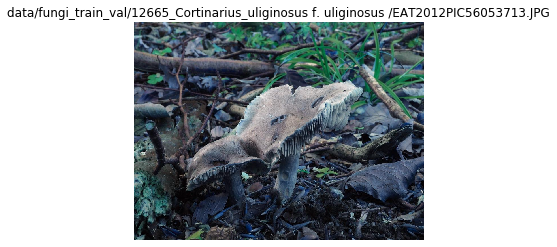

In [4]:
import cv2 
import matplotlib.pyplot as plt

choosen = random.randint(0, len(filelist)-1)
print(filelist[choosen])

img = cv2.imread(filelist[choosen]['path'])  
plt.title(filelist[0]['path'])
plt.grid(False)
plt.axis('off')
plt.imshow(img)
plt.show()

In [5]:
image_id = list(filter(
    lambda x: x['file_name'].replace("images/", "data/fungi_train_val/") == filelist[choosen]['path'],
    data['images']))[0]['id']
category_id = list(filter(lambda x: x['image_id'] == image_id, data['annotations']))[0]['category_id']
category = list(filter(lambda x: x['id'] == category_id, data['categories']))
print(filelist[choosen]['path'], category)

data/fungi_train_val/21144_Tricholoma_sciodes/MAV2017-9217767_S1Sr16PsZ.JPG [{'id': 1104, 'name': 'Tricholoma sciodes', 'supercategory': 'Tricholoma'}]


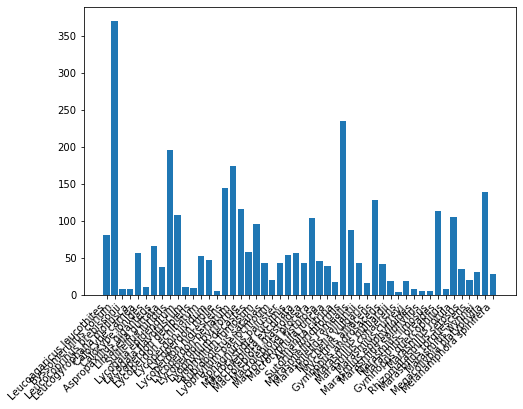

In [6]:
from collections import Counter

occ = Counter(list(map(lambda x: x['category_id'], data['annotations'])))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = list(map(lambda x: x['name'], data['categories']))[:50]
y = [occ[el] for el in occ][:50]
ax.bar(x, y)
ax.set_xticklabels(x, rotation=45, ha='right')
plt.show()

In [7]:
import pandas as pd

for i in range(len(data['images'])):
    data['images'][i]['file_name'] = data['images'][i]['file_name'].replace("images/", "data/fungi_train_val/")

df_images = pd.DataFrame(data['images'])
df_categories = pd.DataFrame(data['categories'])
df_annotations = pd.DataFrame(data['annotations'])
df_images.head()

df = pd.merge(df_images, df_annotations, left_on='id', right_on='image_id')
df = pd.merge(df, df_categories, left_on='category_id', right_on='id')
df.head()

,id_x,file_name,width,license,rights_holder,height,id_y,category_id,image_id,id,name,supercategory
0,21942,data/fungi_train_val/16390_Leucoagaricus_leuco...,1300,1,Ole B. Lyshede,732,43829,650,21942,650,Leucoagaricus leucothites,Leucoagaricus
1,21943,data/fungi_train_val/16390_Leucoagaricus_leuco...,1400,1,Ole B. Lyshede,788,44039,650,21943,650,Leucoagaricus leucothites,Leucoagaricus
2,21944,data/fungi_train_val/16390_Leucoagaricus_leuco...,1400,1,Ole B. Lyshede,788,44255,650,21944,650,Leucoagaricus leucothites,Leucoagaricus
3,22210,data/fungi_train_val/16390_Leucoagaricus_leuco...,567,1,Frank Desting,425,44614,650,22210,650,Leucoagaricus leucothites,Leucoagaricus
4,24812,data/fungi_train_val/16390_Leucoagaricus_leuco...,770,1,Frank Desting,577,45510,650,24812,650,Leucoagaricus leucothites,Leucoagaricus


In [159]:
import pandas as pd

df = pd.DataFrame(filelist)
df_training = df.loc[df['training'] == 1]
df_validation = df.loc[df['training'] == 0]
df.head()

,category,filename,path,training
0,Cortinarius uliginosus f. uliginosus,EAT2012PIC56053713.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,1
1,Cortinarius uliginosus f. uliginosus,FS2013PIC74581197.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,1
2,Cortinarius uliginosus f. uliginosus,MAV2013PIC78715973.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,1
3,Cortinarius uliginosus f. uliginosus,LWL2011PIC60762408.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,1
4,Cortinarius uliginosus f. uliginosus,EAT2012PIC50167264.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,1


In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DIR = os.getcwd()
training_datagen = ImageDataGenerator(rescale=1./255)

img_size = 150

train_generator = training_datagen.flow_from_dataframe(
    df_training,
    DIR,
    'path',
    'category',
    target_size=(img_size, img_size),
    class_mode='categorical'
)

Found 1341 validated image filenames belonging to 20 classes.


In [161]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    df_validation,
    DIR,
    'path',
    'category',
    target_size=(img_size, img_size),
    class_mode='categorical'
)

Found 343 validated image filenames belonging to 20 classes.


In [162]:
classes = [0 for i in range(max(validation_generator.classes)+1)]

for i in range(len(validation_generator.filenames)):
    cat = df.loc[df['path'] == validation_generator.filenames[i]]['category'].values[0]
    classes[validation_generator.classes[i]] = cat

print(classes)

['Amanita citrina var. citrina', 'Amanita strobiliformis', 'Cortinarius alboviolaceus', 'Cortinarius uliginosus f. uliginosus ', 'Entoloma serrulatum', 'Flammulaster subincarnatus', 'Fomes fomentarius', 'Gyrodon lividus', 'Hypocrea pulvinata', 'Lachnum impudicum', 'Lactarius controversus', 'Leotia lubrica', 'Mycena aetites', 'Mycena polygramma', 'Mycena speirea', 'Peniophorella praetermissa', 'Russula alnetorum', 'Russula fellea', 'Schizophyllum commune', 'Trechispora hymenocystis']


In [187]:
import tensorflow as tf

model = tf.keras.models.load_model('models/model_12classes_40acc_150x150img.h5')

In [163]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(n_categories, activation='softmax')
])

In [164]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten

# VGG16
model = tf.keras.models.Sequential([
    Conv2D(input_shape=(100,100,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(units=4096,activation="relu"),
    Dense(units=4096,activation="relu"),
    Dense(units=n_categories, activation="softmax")
])

In [78]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [165]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 15, 15, 128)     

In [166]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model.fit(train_generator, epochs=100,
            validation_data = validation_generator,
            verbose=1, callbacks=[es])

model.save('model.h5')

Epoch 1/100
42/42 [==============================] - 63s 2s/step - loss: 2.7690 - accuracy: 0.1506 - val_loss: 2.7856 - val_accuracy: 0.1808
Epoch 2/100
42/42 [==============================] - 64s 2s/step - loss: 2.6597 - accuracy: 0.1909 - val_loss: 2.6978 - val_accuracy: 0.1895
Epoch 3/100
42/42 [==============================] - 64s 2s/step - loss: 2.4956 - accuracy: 0.2252 - val_loss: 2.4138 - val_accuracy: 0.2566
Epoch 4/100
42/42 [==============================] - 64s 2s/step - loss: 2.3414 - accuracy: 0.2699 - val_loss: 2.3314 - val_accuracy: 0.2741
Epoch 5/100
42/42 [==============================] - 64s 2s/step - loss: 2.1481 - accuracy: 0.3244 - val_loss: 2.2572 - val_accuracy: 0.3149
Epoch 6/100
42/42 [==============================] - 65s 2s/step - loss: 2.0285 - accuracy: 0.3736 - val_loss: 2.1027 - val_accuracy: 0.3732
Epoch 7/100
42/42 [==============================] - 61s 1s/step - loss: 1.8820 - accuracy: 0.4176 - val_loss: 2.2570 - val_accuracy: 0.3294
Epoch 8/100
4

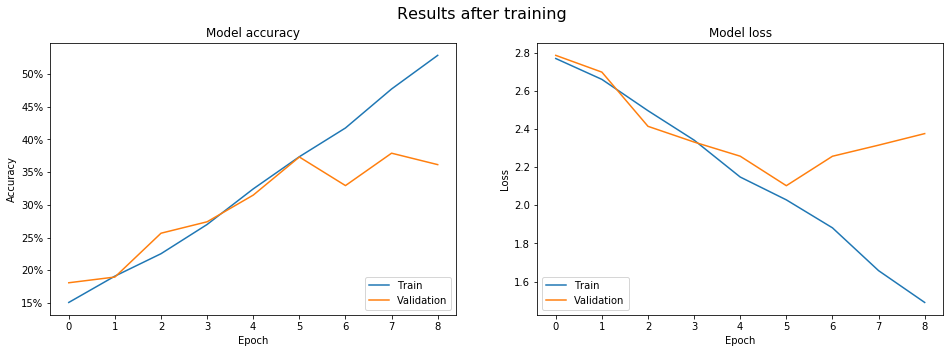

In [167]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Results after training', fontsize=16)

# summarize history for accuracy
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='lower right')

# summarize history for loss
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='lower left')

plt.show()

In [168]:
val_loss, val_acc = model.evaluate(validation_generator)

11/11 [==============================] - 4s 379ms/step - loss: 2.3756 - accuracy: 0.3615


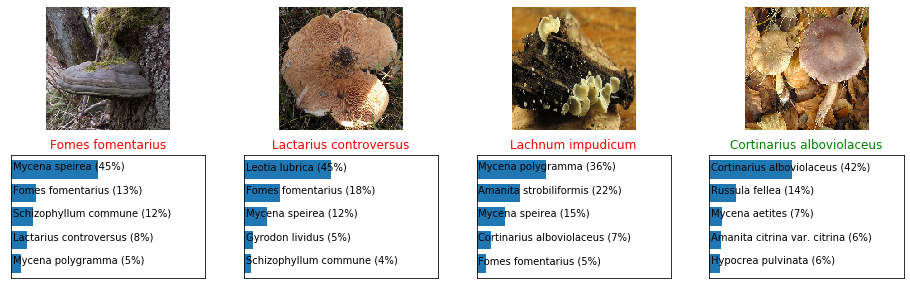

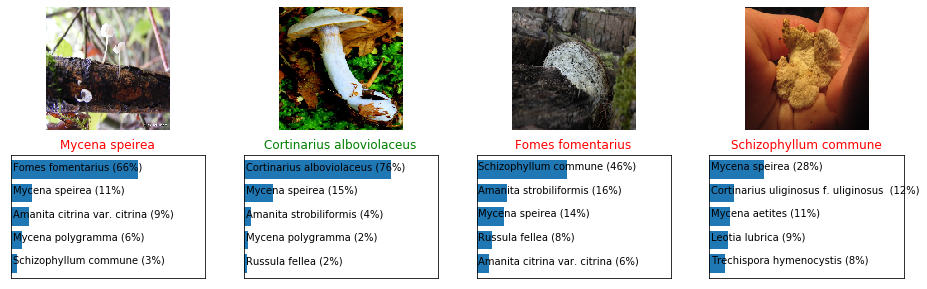

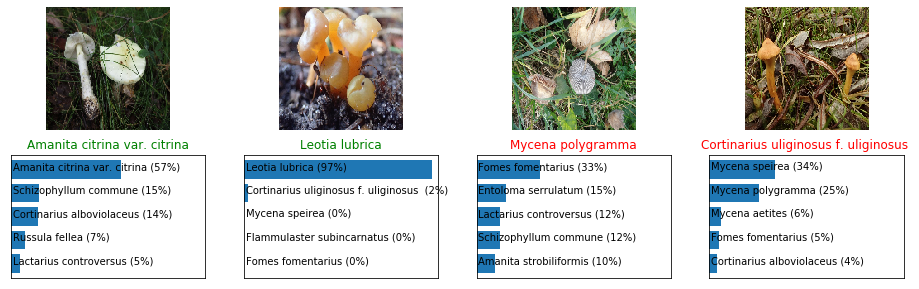

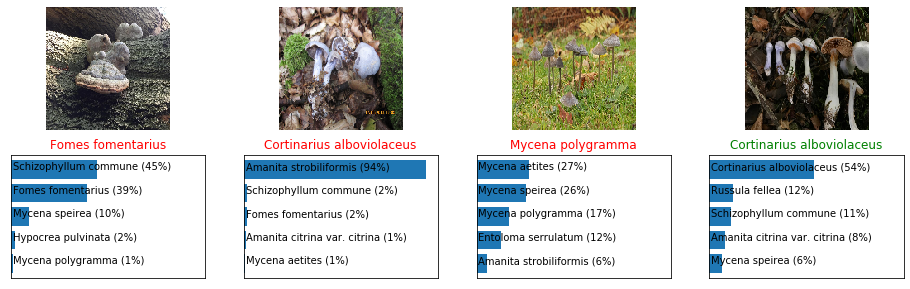

In [169]:
import matplotlib.image as mpimg
import numpy as np

iters = 0
    
for i, batch in enumerate(validation_generator):
    if iters > 3:
        break
    
    batch_images, batch_labels = batch
    
    for j in range(len(batch_images)):
        if iters > 3:
            break
            
        n_cols = 4
            
        fig, axes = plt.subplots(2, n_cols, figsize=(16,5))
        
        for k in range(n_cols):
            prediction = model.predict(np.array([batch_images[j*n_cols+k]]))
            res = [{'label': classes[h], 'val': prediction[0][h]} for h in range(len(classes))]
            res.sort(key=lambda x: x['val'], reverse=True)
            res = res[0:5]
            axes[0][k].imshow(batch_images[j*n_cols+k])
            axes[0][k].grid(False)
            axes[0][k].axis('off')
            title_color = 'green'
            if np.argmax(batch_labels[j*n_cols+k]) != np.argmax(prediction[0]):
                title_color = 'red'
            axes[1][k].set_title(classes[np.argmax(batch_labels[j*n_cols+k])], color=title_color)
            axes[1][k].barh([x['label'] for x in res], [x['val'] for x in res])
            axes[1][k].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
            axes[1][k].set_xlim(0, 1)
            axes[1][k].invert_yaxis()
            axes[1][k].set_xticks([])
            axes[1][k].set_yticks([])
            for h, v in enumerate(res):
                axes[1][k].text(0.01, h, '{} ({:.0%})'.format(v['label'], v['val']))

        plt.show()
        
        iters += 1